# Especialização em Inteligência Artificial - IESB
## Disciplina: Aprendidizado Não Supervisionado
### Trabalho final
### Alunos: David Rocha e Walter Malta

## Problema de negócio

SHAP

https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap

In [2]:
penguins = pd.read_csv('penguins_size.csv')
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
penguins.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [5]:
penguins.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
penguins = penguins.dropna()
penguins = penguins[penguins['sex'] != '.']
penguins = penguins.reset_index(drop=True)
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


### Exploratory Data Analysis

In [7]:
val_count_cols = ['species', 'island', 'sex']
for col in val_count_cols:
    print(penguins[col].value_counts())
    print()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

MALE      168
FEMALE    165
Name: sex, dtype: int64



<AxesSubplot:xlabel='island', ylabel='count'>

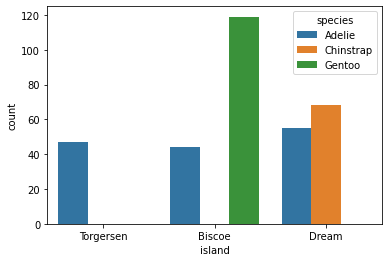

In [8]:
sns.countplot(data=penguins, x='island', hue='species')

<AxesSubplot:xlabel='species', ylabel='count'>

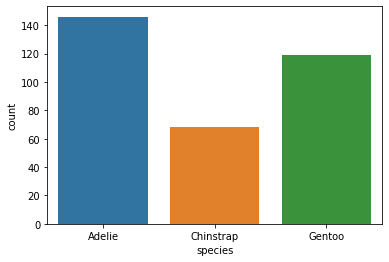

In [9]:
sns.countplot(data=penguins, x='species')

<AxesSubplot:xlabel='sex', ylabel='count'>

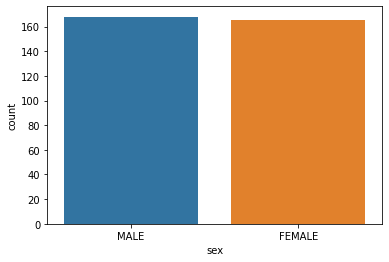

In [10]:
sns.countplot(data=penguins, x='sex')

In [11]:
penguins.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

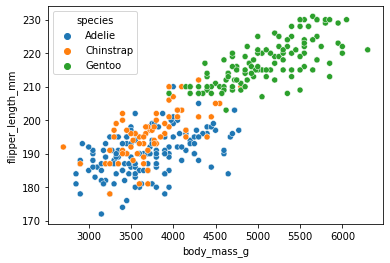

In [12]:
sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm', hue='species')

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

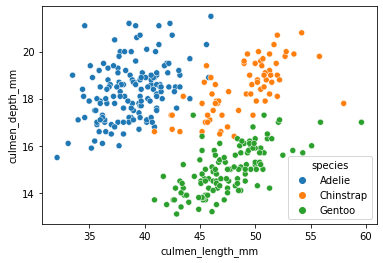

In [13]:
sns.scatterplot(data=penguins, x='culmen_length_mm', y='culmen_depth_mm', hue='species')

<AxesSubplot:xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

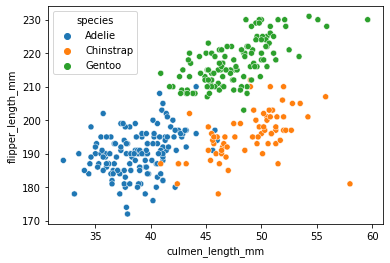

In [14]:
sns.scatterplot(data=penguins, x='culmen_length_mm', y='flipper_length_mm', hue='species')

<AxesSubplot:xlabel='culmen_length_mm', ylabel='body_mass_g'>

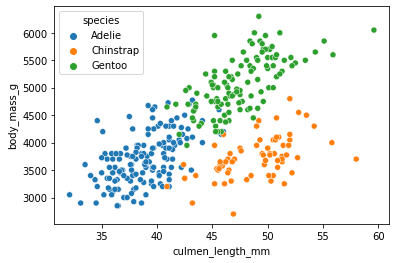

In [15]:
sns.scatterplot(data=penguins, x='culmen_length_mm', y='body_mass_g', hue='species')

In [16]:
px.scatter_3d(penguins, x='culmen_length_mm', y='culmen_depth_mm', z='flipper_length_mm', color='species', title='Penguins Dataset')

In [17]:
px.scatter_3d(penguins, x='culmen_length_mm', y='culmen_depth_mm', z='body_mass_g', color='species', title='Penguins Dataset')

In [18]:
px.scatter_3d(penguins, x='culmen_depth_mm', y='flipper_length_mm', z='body_mass_g', color='species', title='Penguins Dataset')

In [19]:
px.scatter_3d(penguins, x='culmen_length_mm', y='flipper_length_mm', z='body_mass_g', color='species', title='Penguins Dataset')

In [20]:
penguins = penguins[['island', 'species', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
penguins.head()

,island,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Torgersen,Adelie,39.3,20.6,190.0,3650.0,MALE


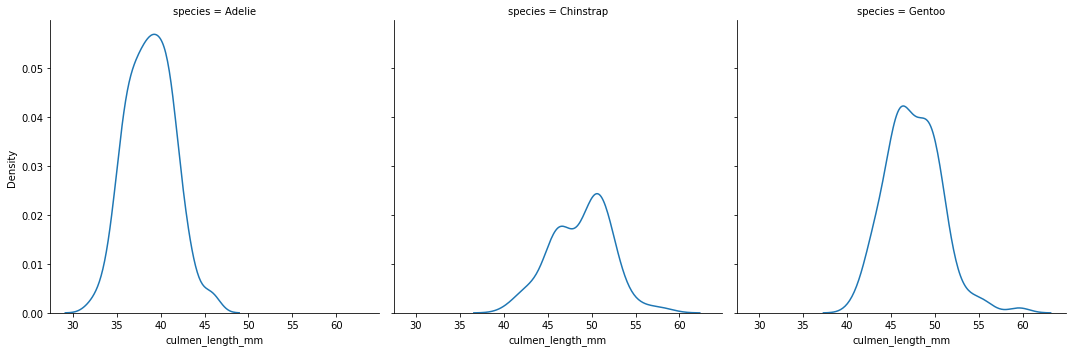

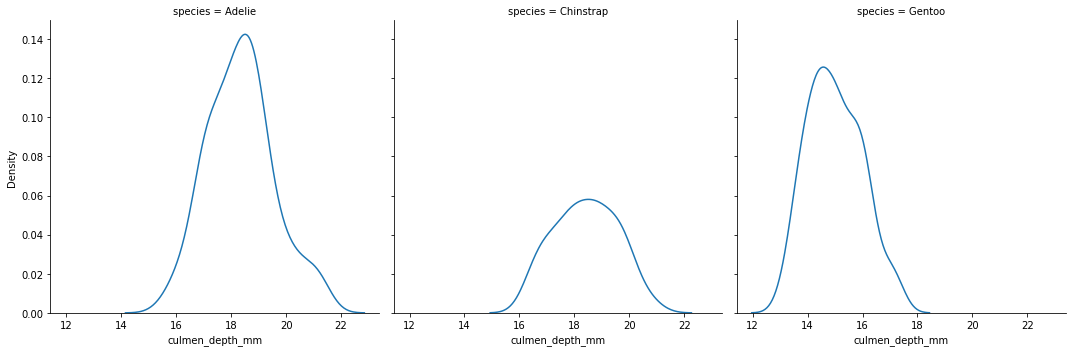

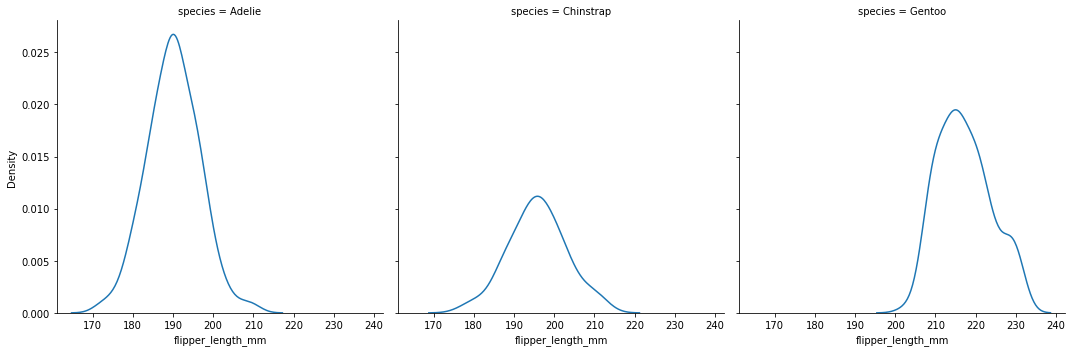

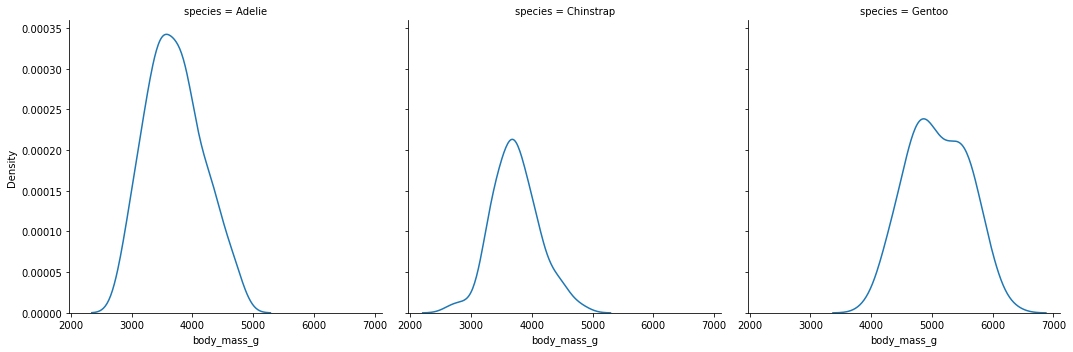

In [21]:
# plot distributions of numerical columns by species

plot_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in plot_cols:
    sns.displot(data=penguins, x=col, col='species', kind='kde')

In [22]:
# statistics for each species

penguins.groupby('species').agg({'culmen_length_mm': ['count', 'min', 'max', 'mean', 'median'], 'culmen_depth_mm': ['count', 'min', 'max', 'mean', 'median'], 'flipper_length_mm': ['count', 'min', 'max', 'mean', 'median'], 'body_mass_g': ['count', 'min', 'max', 'mean', 'median']})

culmen_length_mm                               culmen_depth_mm  \
                     count   min   max       mean median           count   
species                                                                    
Adelie                 146  32.1  46.0  38.823973  38.85             146   
Chinstrap               68  40.9  58.0  48.833824  49.55              68   
Gentoo                 119  40.9  59.6  47.568067  47.40             119   

                                        flipper_length_mm                \
            min   max       mean median             count    min    max   
species                                                                   
Adelie     15.5  21.5  18.347260  18.40               146  172.0  210.0   
Chinstrap  16.4  20.8  18.420588  18.45                68  178.0  212.0   
Gentoo     13.1  17.3  14.996639  15.00               119  203.0  231.0   

                             body_mass_g                                       
                 mean median       count     min     max         mean  median  
species                                                                        
Adelie     190.102740  190.0         146  2850.0  4775.0  3706.164384  3700.0  
Chinstrap  195.823529  196.0          68  2700.0  4800.0  3733.088235  3700.0  
Gentoo     217.235294  216.0         119  3950.0  6300.0  5092.436975  5050.0

In [23]:
# one hot encoding for categoricals

penguins = pd.get_dummies(penguins)
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,1,1,0,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0,0,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0,0,1,0
3,36.7,19.3,193.0,3450.0,0,0,1,1,0,0,1,0
4,39.3,20.6,190.0,3650.0,0,0,1,1,0,0,0,1


In [24]:
# independent and target variables

X = penguins.drop(columns='body_mass_g')
y = penguins['body_mass_g']

print(X.shape, y.shape)

(333, 11) (333,)


## Random Forest Regressor -> predict body mass

In [25]:
# split dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(266, 11) (266,) (67, 11) (67,)


In [26]:
# model

model = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=20, min_samples_split=30, max_features=1, random_state=7)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features=1, min_samples_split=30,
                      random_state=7)

[Text(209.25000000000003, 195.696, 'X[7] <= 0.5\nmse = 713802.646\nsamples = 166\nvalue = 4287.97'),
 Text(181.35000000000002, 152.208, 'X[8] <= 0.5\nmse = 767756.988\nsamples = 140\nvalue = 4378.111'),
 Text(111.60000000000001, 108.72, 'X[10] <= 0.5\nmse = 237284.62\nsamples = 78\nvalue = 3700.21'),
 Text(55.800000000000004, 65.232, 'X[5] <= 0.5\nmse = 72762.698\nsamples = 37\nvalue = 3345.082'),
 Text(27.900000000000002, 21.744, 'mse = 79775.52\nsamples = 27\nvalue = 3336.957'),
 Text(83.7, 21.744, 'mse = 50433.333\nsamples = 10\nvalue = 3370.0'),
 Text(167.4, 65.232, 'X[3] <= 0.5\nmse = 138177.207\nsamples = 41\nvalue = 4073.707'),
 Text(139.5, 21.744, 'mse = 146940.547\nsamples = 29\nvalue = 4072.024'),
 Text(195.3, 21.744, 'mse = 115146.484\nsamples = 12\nvalue = 4078.125'),
 Text(251.10000000000002, 108.72, 'X[10] <= 0.5\nmse = 268195.977\nsamples = 62\nvalue = 5139.151'),
 Text(223.20000000000002, 65.232, 'mse = 75557.945\nsamples = 28\nvalue = 4653.723'),
 Text(279.0, 65.232, '

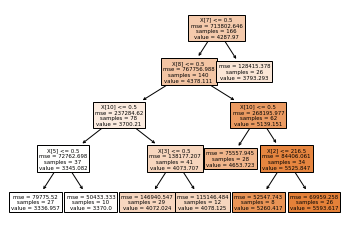

In [27]:
# plot for tree number 5 of the random forest model

from sklearn.tree import plot_tree

estimator = model.estimators_[5]

plot_tree(estimator, filled = True)

In [28]:
# predictions for train and test sets

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [29]:
# performance metrics for train and test sets

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Train: MAE={mae_train} / MSE={mse_train} / R2: {r2_train}')
print(f'Test: MAE={mae_test} / MSE={mse_test} / R2: {r2_test}')

Train: MAE=227.24073991184062 / MSE=86006.69494581848 / R2: 0.869052917083086
Test: MAE=227.20652137525067 / MSE=78749.41899982275 / R2: 0.8669440122965669


## Shap explainers

In [30]:
explainer = shap.Explainer(model)
shap_values1 = explainer(X_test)
expected_value = explainer.expected_value

shap_values2 = shap_values = shap.TreeExplainer(model).shap_values(X_test)

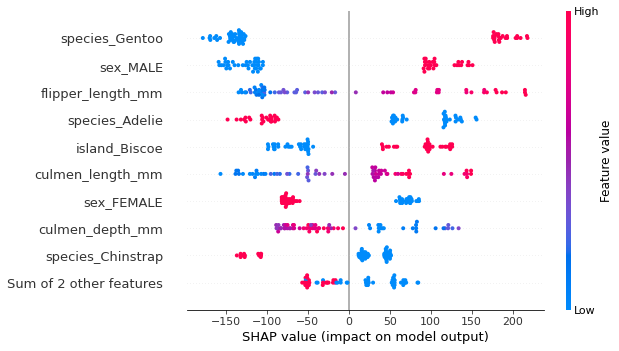

In [31]:
shap.plots.beeswarm(shap_values1)

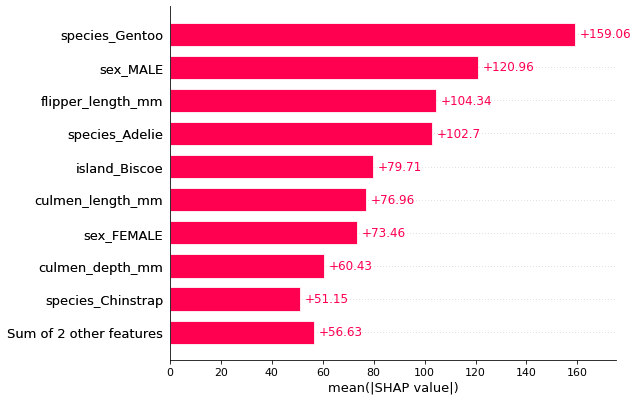

In [32]:
shap.plots.bar(shap_values1)

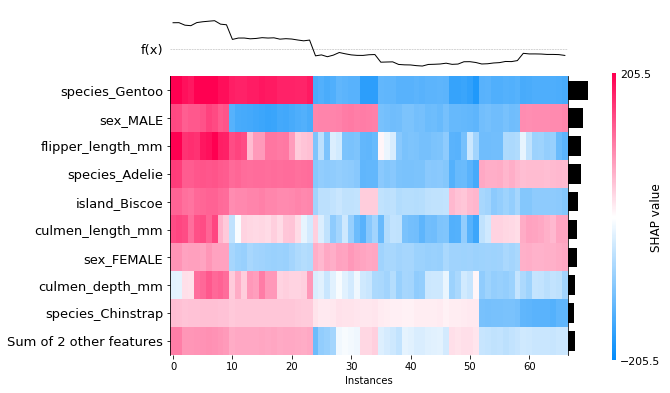

In [33]:
shap.plots.heatmap(shap_values1)

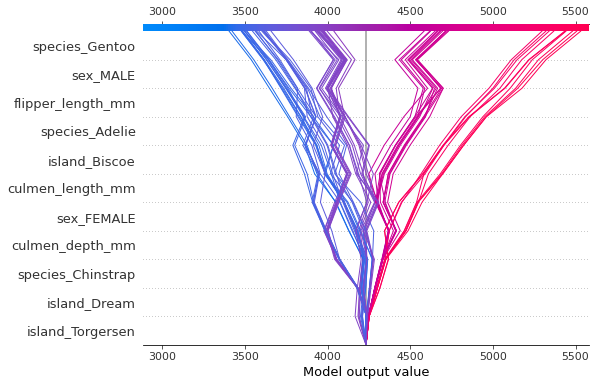

In [34]:
shap.decision_plot(expected_value, shap_values2[:, :], X_test.iloc[:, :])

C:\Users\gulia\anaconda3\envs\tpot\lib\site-packages\shap\plots\_scatter.py:642: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



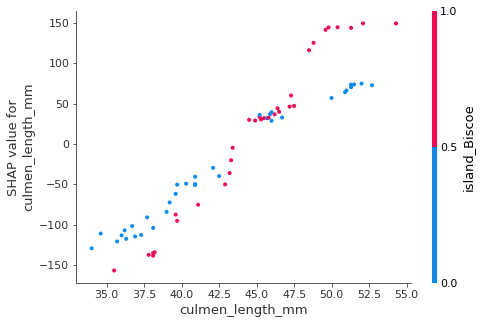

In [35]:
shap.dependence_plot('culmen_length_mm', shap_values2, X_test)

C:\Users\gulia\anaconda3\envs\tpot\lib\site-packages\shap\plots\_scatter.py:642: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



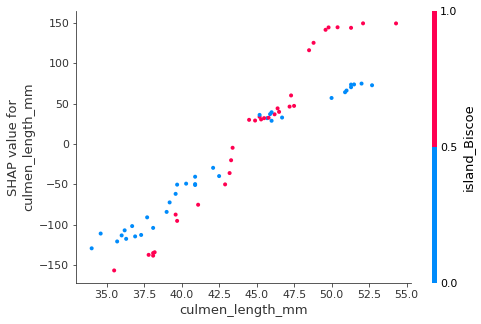

In [36]:
shap.dependence_plot('culmen_length_mm', shap_values2, X_test)

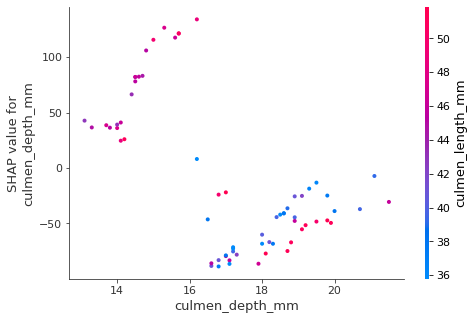

In [37]:
shap.dependence_plot('culmen_depth_mm', shap_values2, X_test)

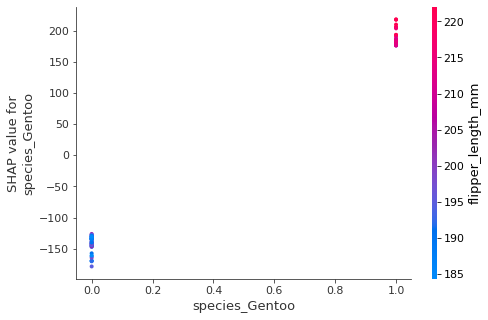

In [38]:
shap.dependence_plot('species_Gentoo', shap_values2, X_test)

C:\Users\gulia\anaconda3\envs\tpot\lib\site-packages\shap\plots\_scatter.py:642: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



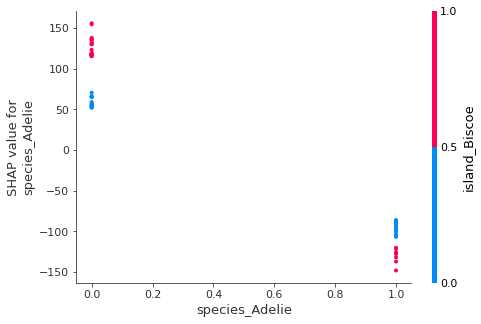

In [39]:
shap.dependence_plot('species_Adelie', shap_values2, X_test)

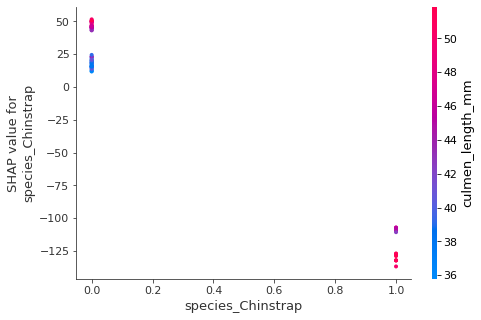

In [40]:
shap.dependence_plot('species_Chinstrap', shap_values2, X_test)

C:\Users\gulia\anaconda3\envs\tpot\lib\site-packages\shap\plots\_scatter.py:642: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



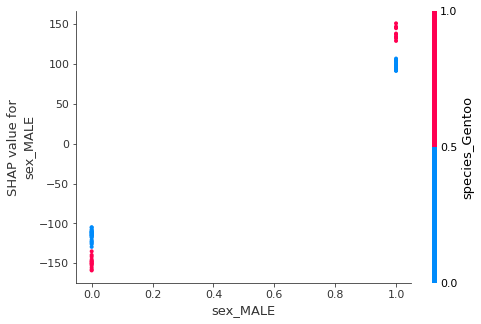

In [41]:
shap.dependence_plot('sex_MALE', shap_values2, X_test)

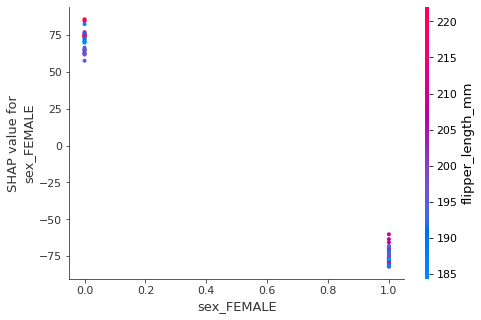

In [42]:
shap.dependence_plot('sex_FEMALE', shap_values2, X_test)

In [43]:
shap.initjs()

def p(j):
    return(shap.force_plot(explainer.expected_value, shap_values2[j,:], X_test.iloc[j,:]))

In [44]:
shap.force_plot(expected_value, shap_values2, X_test.iloc[:, :])

In [45]:
p(0)

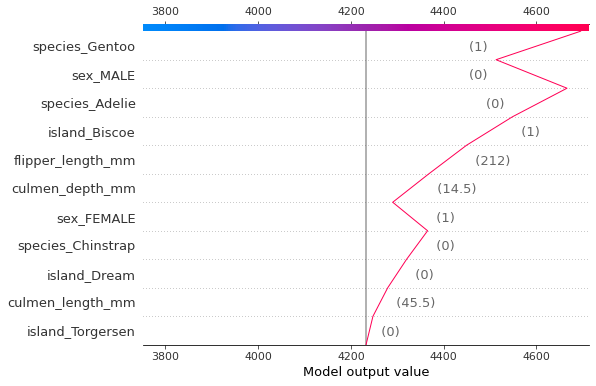

In [46]:
shap.decision_plot(expected_value, shap_values2[0, :], X_test.iloc[0, :])

In [47]:
p(33)

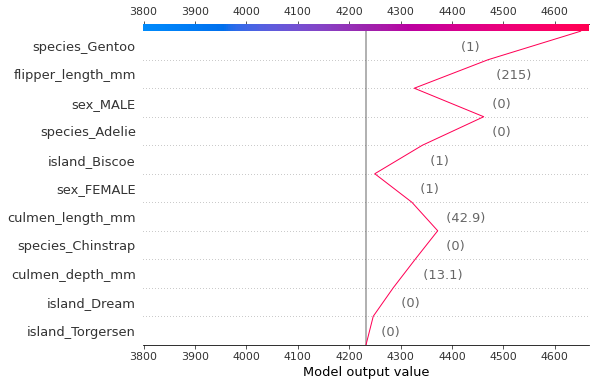

In [48]:
shap.decision_plot(expected_value, shap_values2[33, :], X_test.iloc[33, :])

In [49]:
p(7)

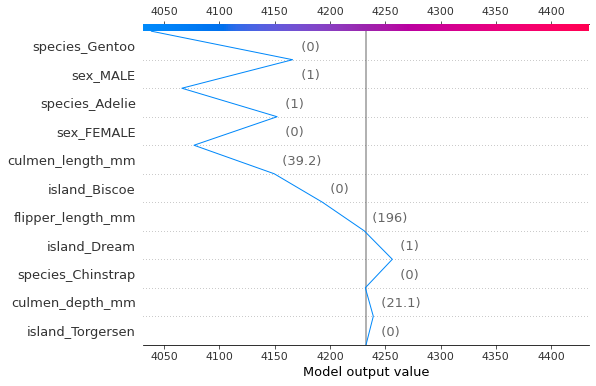

In [50]:
shap.decision_plot(expected_value, shap_values2[7, :], X_test.iloc[7, :])

In [51]:
p(27)

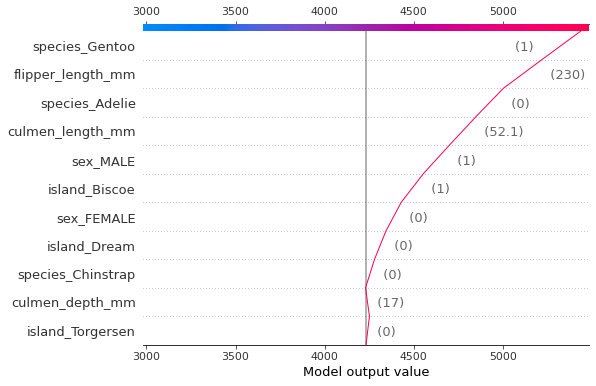

In [52]:
shap.decision_plot(expected_value, shap_values2[27, :], X_test.iloc[27, :])